# Analyze Methods
This notebook demonstrates how to train and evaluate the classifiers for sentence-level target identification.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import os
import pickle
import gensim

In [8]:
# Set this to true if you want to load the pickle files
LOAD_PREV_EVAL=False

## Below are all of the local imports

In [4]:
import sys
sys.path.append("..")

In [5]:
import sentence_annotation

In [6]:
import evaluate_code
import standard_methods
import novel_methods

## Load the word2vec models

In order to run this notebook, you must download the pre-trained word2vec model, which is available for download at:
http://yuca.test.iminds.be:8900/fgodin/downloads/word2vec_twitter_model.tar.gz

In [10]:
import word2vec
import word2vecReader

# The location of the .bin file is specific to where you downloaded the file (of course)
w2v_tweets = word2vecReader.Word2Vec.load_word2vec_format("/mnt/bd2/word2vec_twitter_model/word2vec_twitter_model.bin",binary=True)

In [19]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    eval_results = evaluate_code.evaluate_method(evaluate_code.create_pipeline_bow_rf(),training_data_dir="training_data")

Evaluating tweets
52 2
52 4
52 6
52 8
52 10
52 12
52 14
52 16
52 18
52 20
52 22
52 24
52 26
52 28
52 30
52 32
52 34
52 36
52 38
52 40
52 42
52 44
52 46
52 48
52 50


In [20]:
eval_results

{'tweets': {1: array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.33333333, 0.33333333, 0.33333333, 0.32432432, 0.33333333,
         0.4047619 , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
         0.5       , 0.39290918, 0.33333333, 0.33333333, 0.33333333]),
  2: array([0.33333333, 0.32394366, 0.41978022, 0.44537815, 0.49427393,
         0.6       , 0.33333333, 0.36703297, 0.33333333, 0.44537815,
         0.33333333, 0.55770075, 0.43180648, 0.46784922, 0.40740741,
         0.33333333, 0.37802817, 0.42222222, 0.33333333, 0.33333333]),
  3: array([0.37990196, 0.52083333, 0.397151  , 0.59649123, 0.52083333,
         0.44957265, 0.44957265, 0.59649123, 0.42328358, 0.48009828,
         0.55769231, 0.33333333, 0.51809524, 0.43526786, 0.56190476,
         0.44957265, 0.42090859, 0.53265602, 0.42328358, 0.494022  ]),
  4: array([0.5954023 , 0.47276688, 0.44242424, 0.54482759, 0.45454545,
         0.32767402, 0.6574987 , 0.33333333, 0.39310345, 0.45454545,
      

In [11]:
if not LOAD_PREV_EVAL:              
    alignment_v2_tweets = lambda w,x,y,z: novel_methods.alignment_v2(w2v_tweets,w,x,y,z)
    alignment_v2_tweets_prediction_record = evaluate_code.evaluate_method(alignment_v2_tweets,alignment_flag=True)
    open("results/alignment_v2_tweets_prediction_record.pkl","wb").write(pickle.dumps(alignment_v2_tweets_prediction_record))


Evaluating tweets


In [12]:
if not LOAD_PREV_EVAL:              
    threshold = 0.8
    alignment_v1_tweets = lambda w,x,y,z: novel_methods.alignment_v1(w2v_tweets,threshold,w,x,y,z)
    alignment_v1_tweets_prediction_record = evaluate_code.evaluate_method(alignment_v1_tweets,alignment_flag=True)
    open("results/alignment_v1_tweets_prediction_record.pkl","wb").write(pickle.dumps(alignment_v1_tweets_prediction_record))
else:
    alignment_v1_tweets_prediction_record = pickle.load(open("results/alignment_v1_tweets_prediction_record.pkl","rb"))
   

Evaluating tweets


In [13]:
if not LOAD_PREV_EVAL:
    svm_v1_prediction_record = evaluate_code.evaluate_method(standard_methods.svm_v1)
    open("results/svm_v1_prediction_record.pkl","wb").write(pickle.dumps(svm_v1_prediction_record))
else:
    svm_v1_prediction_record = pickle.load(open("results/svm_v1_prediction_record.pkl","rb"))

Evaluating tweets


In [14]:
if not LOAD_PREV_EVAL:
    bag_of_words_nb_prediction_record = evaluate_code.evaluate_method(standard_methods.bag_of_words_nb)
    open("results/bag_of_words_nb_prediction_record_tweets.pkl","wb").write(pickle.dumps(bag_of_words_nb_prediction_record))
else:
    bag_of_words_nb_prediction_record = pickle.load(open("results/bag_of_words_nb_prediction_record_tweets.pkl","rb"))

Evaluating tweets


In [15]:
from sklearn.metrics import f1_score

def calc_statistics(prediction_record):
    statistics = {}
    for label, value in prediction_record.items():
        statistics[label] = {}
        training_sizes = np.sort(list(prediction_record[label].keys()))        
        for training_size in training_sizes:
            statistics[label][training_size] = {}
            iterations = list(prediction_record[label][training_size].values())
            statistics[label][training_size]["accuracy"] = np.zeros(len(iterations),)
            statistics[label][training_size]["f1_score"] = np.zeros(len(iterations),)
            for it in range(len(iterations)):
                y_true = np.round(prediction_record[label][training_size][it]["testing_labels"])
                y_pred = np.round(prediction_record[label][training_size][it]["testing_pred_labels"])
                statistics[label][training_size]["accuracy"][it] = np.sum(y_pred == y_true)*1.0/len(y_true)
                statistics[label][training_size]["f1_score"][it] = f1_score(y_true,y_pred)
    return statistics

In [16]:
bag_of_words_nb_statistics = calc_statistics(bag_of_words_nb_prediction_record)
alignment_v1_tweets_statistics = calc_statistics(alignment_v1_tweets_prediction_record)
svm_v1_statistics = calc_statistics(svm_v1_prediction_record)
alignment_v2_tweets_statistics = calc_statistics(alignment_v2_tweets_prediction_record)


c:\users\paule\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
import matplotlib.pyplot as plt

def create_plots(prediction_statistics_array,names,metric="accuracy"):    
    linestyles = ['-', '--', '-.', ':','-']

    auc = {}
    for label, value in prediction_statistics_array[0].items():
        auc[label] = []
        plt.figure()
        #plt.title(label.replace("_"," "))
        if metric == "accuracy":
            plt.ylabel('Accuracy')
        if metric == "f1_score":
            plt.ylabel('F1')            
        plt.xlabel('Training Size')

        for i in range(len(prediction_statistics_array)):
            auc[label].append({})
            prediction_statistics = prediction_statistics_array[i]
            training_sizes = np.sort(list(prediction_statistics[label].keys()))
            means = []
            sderrs = []
            for sz in training_sizes:
                means.append(np.mean(prediction_statistics[label][sz][metric]))                
                sderrs.append(np.std(prediction_statistics[label][sz][metric])/np.sqrt(len(prediction_statistics[label][sz][metric])))

            #plt.errorbar(training_sizes, means, yerr=sderrs, fmt='o')
            try:
                plt.plot(training_sizes, means, linestyle=linestyles[i])
            except:
                import pdb
                pdb.set_trace()
                print('here')
                        
            lower_bound_means = np.array(means)-1.96*np.array(sderrs)
            upper_bound_means = np.array(means)+1.96*np.array(sderrs)
            auc[label][i]["lower"] = np.trapz(lower_bound_means,x=training_sizes*1./np.max(training_sizes))
            auc[label][i]["upper"] = np.trapz(upper_bound_means,x=training_sizes*1./np.max(training_sizes))
            auc[label][i]["average"] = (auc[label][i]["lower"]+auc[label][i]["upper"])/2.

        plt.legend(names)
        plt.savefig('results/f1_images/'+label+'.png', bbox_inches='tight')

        
    return auc


In [18]:
names = ["Naive Bayes","SVM","Alignment v1 (Tweet)","Alignment v2 (Tweets)"]
statistics = [bag_of_words_nb_statistics,svm_v1_statistics,alignment_v1_tweets_statistics,alignment_v2_tweets_statistics]

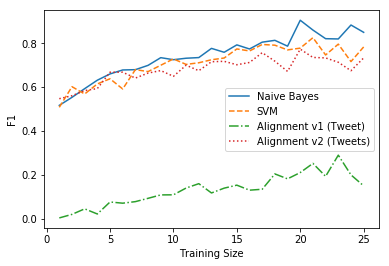

In [20]:
auc = create_plots(statistics,names,metric="f1_score")

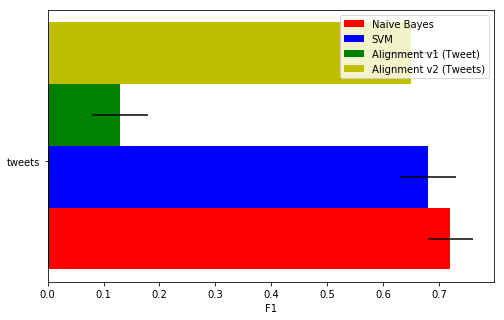

In [22]:
N = 0
labels = []
F1_scores = []
for label, value in auc.items():
    N = N + 1
    labels.append(label)
    F1_scores.append(-1.*auc[label][3]["average"])

inxs = np.argsort(F1_scores)
labels = list(np.array(labels)[inxs])
        
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

rects = []
colors = ["r","b","g","y","c"]            
for i in range(len(names)):
    means = []
    errors = []
    for label in labels:
        lower = np.round(100*auc[label][i]["lower"])/100
        upper = np.round(100*auc[label][i]["upper"])/100
        average = np.round(100*auc[label][i]["average"])/100
        means.append(average)
        errors.append(upper-average)
    
    rects.append(ax.barh(ind + width*(i-1), means,width, color=colors[i], xerr=errors))

# add some text for labels, title and axes ticks
ax.set_xlabel('F1')
#ax.set_title('Scores by group and gender')
ax.set_yticks(ind + width / len(names))
ax.set_yticklabels(labels)

legend_ref = []
for rect in rects:
    legend_ref.append(rect[0])
ax.legend(legend_ref, names)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)

plt.savefig('results/f1_images/histogram.png', bbox_inches='tight')
plt.show()


### Code to generate the latex table

In [23]:
first = True
for label in labels:
        if first:
            print("Category",end="")
            print(" & ",end="")
            print("\# Samples",end="")
            for i in range(len(names)):
                print(" & ",end="")
                print(names[i],end="")
            print(" \\\\ \hline")
            first = False

        plabel = label.replace("_"," ")
        plabel = plabel.replace("NeighborhoodArea ","")
        plabel = plabel.replace("Interior ","")
        plabel = plabel.replace("PropertyLot ","")
        plabel = plabel.replace("Community ","")
        print(plabel,end="")
        print(" & ",end="")
        print(len(statistics[0][label].keys()),end="")
        for i in range(len(names)):
            print(" & ",end="")
            lower = np.round(100*auc[label][i]["lower"])/100
            upper = np.round(100*auc[label][i]["upper"])/100
            print(str(lower)+" - "+str(upper),end="")
        
        print("\\\\")

Category & \# Samples & Naive Bayes & SVM & Alignment v1 (Tweet) & Alignment v2 (Tweets) \\ \hline
tweets & 25 & 0.68 - 0.76 & 0.63 - 0.73 & 0.08 - 0.18 & 0.6 - 0.7\\
